In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

/home/reza/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
img = Image.open("Data/linux.jpg")

gray_img = img.convert('L')
print("Original image size:", gray_img.size)

Original image size: (1080, 661)


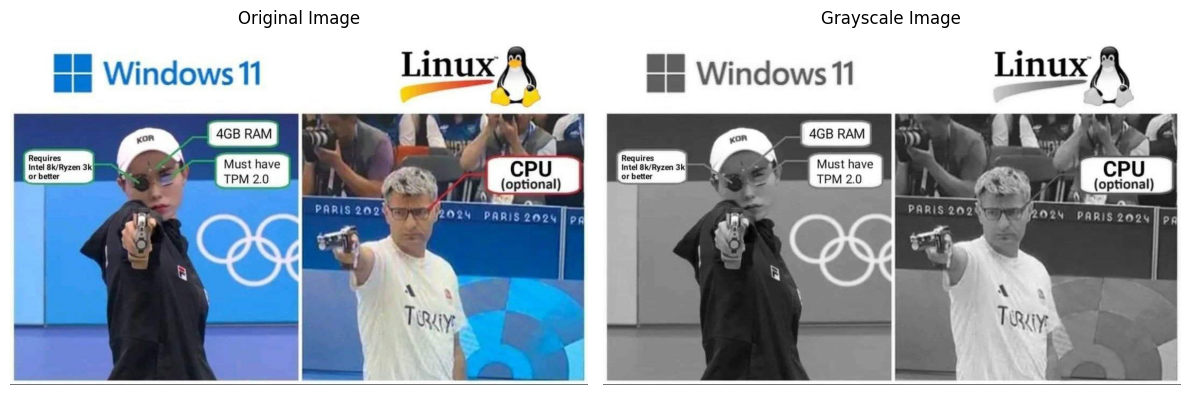

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(img)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(gray_img, cmap='gray')
axs[1].set_title('Grayscale Image')
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [4]:
gray_img = gray_img.resize((128, 128))

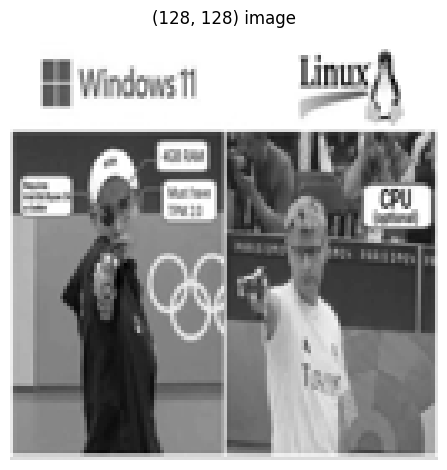

In [5]:
plt.imshow(gray_img, cmap="gray")
plt.title("{} image" .format(gray_img.size))
plt.axis("off")

plt.tight_layout()
plt.show()

In [6]:
gray_img_array = np.array(gray_img)

print("Grayscale image array shape:", gray_img_array.shape)


print("Image Matrix:")
print(gray_img_array)

Grayscale image array shape: (128, 128)
Image Matrix:
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [230 143 138 ... 165 163 224]
 [246 212 209 ... 216 214 242]
 [217 220 221 ... 217 218 216]]


In [7]:
np.savetxt("Data/Linux.txt", gray_img_array, fmt="%d")

In [8]:
def convolve(x, kernel):
    x_height = x.shape[0]
    x_width = x.shape[1]
    
    kernel_height = kernel.shape[0]
    kernel_width = kernel.shape[1]
    
    H = (kernel_height - 1) // 2
    W = (kernel_width - 1) // 2
    
    out = np.zeros((x_height, x_width))
    # iterate over all the pixel of image X
    for i in np.arange(H, x_height - H):
        for j in np.arange(W, x_width - W):
            sum = 0
            # iterate over the filter
            for k in np.arange(-H, H + 1):
                for l in np.arange(-W, W + 1):
                    # get the corresponding value from image and filter
                    a = x[i + k, j + l]
                    w = kernel[H + k, W + l]
                    sum += (w * a)
            out[i, j] = sum
    return out

In [9]:
x_kernel = np.array([ [-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1] ])



y_kernel = np.array([ [-1, -1, -1],
                      [0, 0, 0],
                      [1, 1, 1] ])

In [ ]:
pre_x = convolve(gray_img_array, x_kernel)
pre_y = convolve(gray_img_array, y_kernel)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(pre_x)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(pre_y, cmap='gray')
axs[1].set_title('Grayscale Image')
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# calculate the gradient magnitude of vectors
edge_out = np.sqrt(np.power(pre_x, 2) + np.power(pre_y, 2))
edge_out = (edge_out / np.max(edge_out)) * 255

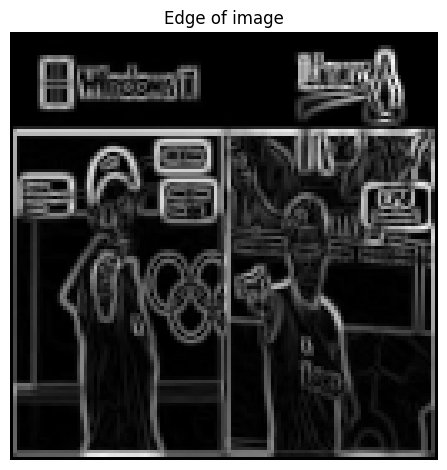

In [19]:
plt.imshow(edge_out, cmap="gray")
plt.title("Edge of image")
plt.axis("off")

plt.tight_layout()
plt.show()

In [127]:
np.savetxt("Data/edge_output.txt", edge_out, fmt="%d")